# IMPORTAR LIBRERÍAS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('../../99 PRUEBAS a los CSV/01 Prueba quitando eventos/04DesNat_DEFS_limpio_fc.csv')
df.head(5)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,0,0,1900,0,0,11000,0,0
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,0,0,1900,0,0,1250000,0,0
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4,18,1902,4,18,2000,0,843726
3,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,NaN,1904,11,0,1904,11,0,0,0,0
4,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4,4,1905,4,4,20000,0,812477


In [10]:
df['Region'].unique()

array(['Western Africa', 'Southern Asia', 'Central America',
       'South America', 'Western Europe', 'Eastern Asia', 'Caribbean',
       'Northern Africa', 'Northern America', 'South-Eastern Asia',
       'Eastern Europe', 'Southern Europe', 'Melanesia', 'Polynesia',
       'Eastern Africa', 'Northern Europe', 'Western Asia',
       'Australia and New Zealand', 'Micronesia', 'Southern Africa',
       'Middle Africa', 'Russian Federation', 'Central Asia'],
      dtype=object)

Hay 23 regiones. Demasiadas para codificar. Pensar en codificar por continente

## Codificación categórico a numérico


In [4]:

df['Disaster Type'].value_counts()

Flood         5808
Storm         4618
Earthquake    1597
Drought        803
Name: Disaster Type, dtype: int64

In [6]:
# Función personalizada para tratar la columna Disaster Type
def classify_disaster(Disaster_Type):
    if 'Drought' in Disaster_Type:
        return 1
    elif 'Earthquake' in Disaster_Type:
        return 2
    elif 'Storm' in Disaster_Type:
        return 3
    else:
        return 4
    
df['Disaster_int'] = df['Disaster Type'].apply(classify_disaster)
df['Disaster_int'].value_counts()

4    5808
3    4618
2    1597
1     803
Name: Disaster_int, dtype: int64

In [7]:
df.head()

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj,Disaster_int
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,1900,0,0,1900,0,0,11000,0,0,1
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,1900,0,0,1900,0,0,1250000,0,0,1
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,1902,4,18,1902,4,18,2000,0,843726,2
3,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,1904,11,0,1904,11,0,0,0,0,3
4,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,1905,4,4,1905,4,4,20000,0,812477,2


<Axes: xlabel='Region', ylabel='Total Affected'>

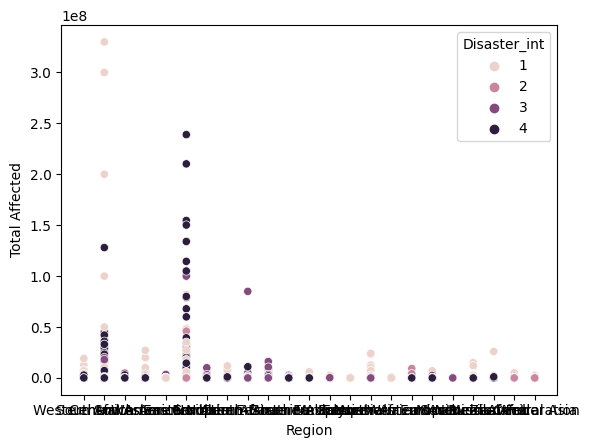

In [8]:
sns.scatterplot(data=df, x='Region', y='Total Affected', hue='Disaster_int')